## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [22]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [23]:
train, test = keras.datasets.cifar10.load_data()

In [24]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [25]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [26]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [27]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.5, 0.25, 0.01]


In [34]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_exp in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout_exp)
    model.summary()

    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    # Collect results    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    name_tag = 'drop_rate_%.2f' % dropout_exp
    results[name_tag] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc': train_acc,
                         'valid-acc': valid_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 22s 433us/step - loss: 1.9100 - acc: 0.2843 - val_loss: 1.9364 - val_acc: 0.3058
Epoch 50/50
50000/50000 [==============================] - 21s 429us/step - loss: 1.9191 - acc: 0.2833 - val_loss: 1.9384 - val_acc: 0.3091
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
______

50000/50000 [==============================] - 21s 429us/step - loss: 1.4810 - acc: 0.4665 - val_loss: 1.4351 - val_acc: 0.4925
Epoch 48/50
50000/50000 [==============================] - 21s 429us/step - loss: 1.4786 - acc: 0.4674 - val_loss: 1.4387 - val_acc: 0.4919
Epoch 49/50
50000/50000 [==============================] - 22s 432us/step - loss: 1.4823 - acc: 0.4665 - val_loss: 1.4409 - val_acc: 0.4858
Epoch 50/50
50000/50000 [==============================] - 22s 441us/step - loss: 1.4739 - acc: 0.4707 - val_loss: 1.4327 - val_acc: 0.4888
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0

50000/50000 [==============================] - 28s 560us/step - loss: 0.7572 - acc: 0.7266 - val_loss: 1.6213 - val_acc: 0.5136
Epoch 46/50
50000/50000 [==============================] - 30s 605us/step - loss: 0.7365 - acc: 0.7332 - val_loss: 1.6551 - val_acc: 0.5169
Epoch 47/50
50000/50000 [==============================] - 27s 532us/step - loss: 0.7277 - acc: 0.7376 - val_loss: 1.6837 - val_acc: 0.5074
Epoch 48/50
50000/50000 [==============================] - 26s 527us/step - loss: 0.7175 - acc: 0.7433 - val_loss: 1.7301 - val_acc: 0.5039
Epoch 49/50
50000/50000 [==============================] - 27s 532us/step - loss: 0.7105 - acc: 0.7416 - val_loss: 1.6775 - val_acc: 0.5178
Epoch 50/50
50000/50000 [==============================] - 26s 522us/step - loss: 0.6980 - acc: 0.7484 - val_loss: 1.6921 - val_acc: 0.5166


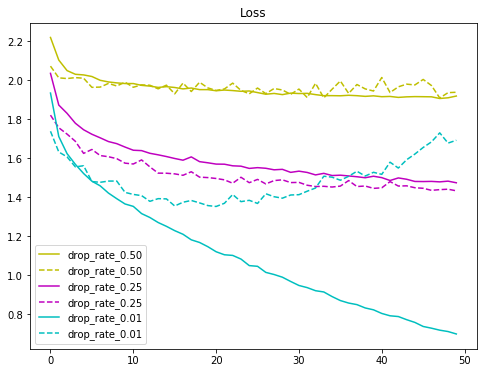

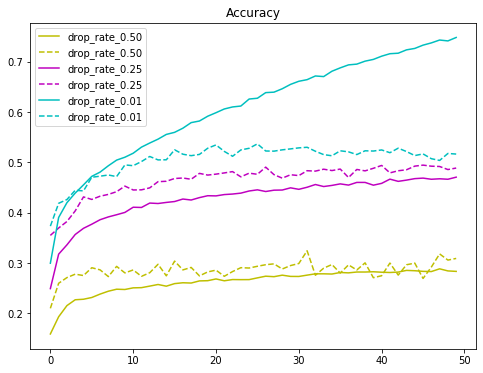

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""


color_bar = ["y", "m", "c"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
